In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('track_drive_v1.csv')

In [49]:
df.columns

Index(['time_seconds', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'TrackDrive_friction',
       'TrackDrive_damping', 'TrackDrive_stiffness',
       'TrackDrive_position_setpoint', 'TrackDrive_velocity_setpoint',
       'TrackDrive_effort_setpoint', 'TrackDrive_effort_measured',
       'TrackDrive_effort_applied', 'TrackDrive_position',
       'TrackDrive_velocity', 'Track_position_x', 'Track_position_y',
       'Track_position_z', 'Track_velocity_x', 'Track_velocity_y',
       'Track_velocity_z', 'Track_acceleration_x', 'Track_acceleration_y',
       'Track_acceleration_z', 'Track_angular_velocity_x',
       'Track_angular_velocity_y', 'Track_angular_velocity_z',
       'Track_angular_acceleration_x', 'Track_angular_acceleration_y',
       'Track

In [50]:
df["TailDrive_velocity_setpoint"]

0      0.000000
1      0.344828
2      0.689655
3      1.034483
4      1.379310
         ...   
285    0.000000
286    0.000000
287    0.000000
288    0.000000
289    0.000000
Name: TailDrive_velocity_setpoint, Length: 290, dtype: float64

In [51]:
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Parameters Track Drive": ["TrackDrive_friction", "TrackDrive_damping", "TrackDrive_stiffness"],
    "Track Velocity [m/s]": ["TrackDrive_velocity_setpoint", "TrackDrive_velocity"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailJoint_torque_x", "TailJoint_torque_y", "TailJoint_torque_z"],
}

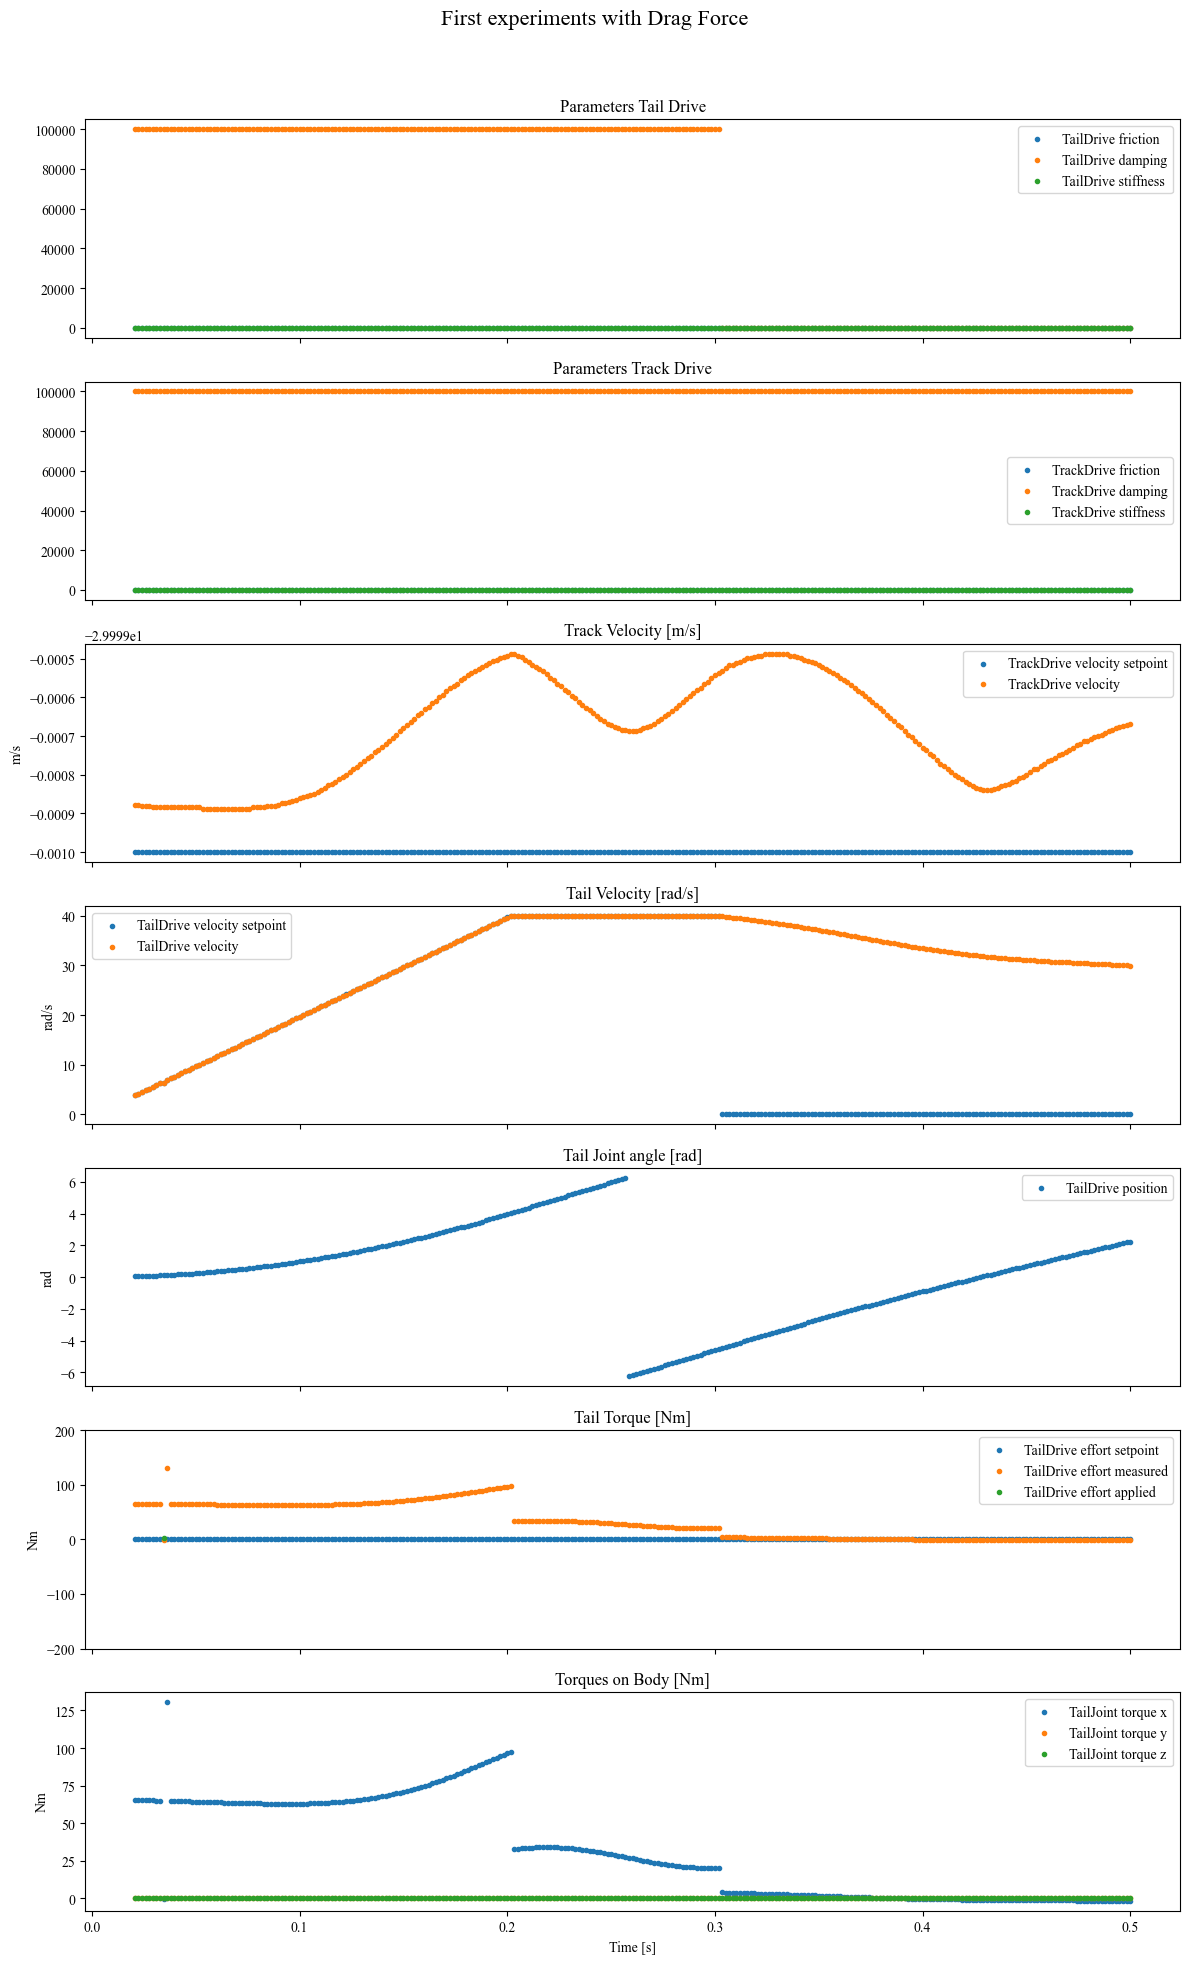

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data(df, plot_dict, suptitle, time_range=None, figsize=(12, 20)):
    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(plot_dict), 1, figsize=figsize, sharex=True)
    
    if len(plot_dict) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=16)

    # Apply time range if specified
    if time_range:
        df = df[(df['time_seconds'] >= time_range[0]) & (df['time_seconds'] <= time_range[1])]

    for ax, (title, columns) in zip(axes, plot_dict.items()):
        for column in columns:
            ax.scatter(df['time_seconds'], df[column], label=column.replace('_', ' '), marker='.')

        # Set the title of the subplot
        ax.set_title(title)

        # Add y-axis units based on specific strings in the title
        if 'Torque' in title:
            ax.set_ylabel('Nm')
        elif 'Force' in title:
            ax.set_ylabel('N')
        elif 'Velocity' in title:
            ax.set_ylabel('m/s' if 'Track' in title else 'rad/s')
        elif 'angle' in title:
            ax.set_ylabel('rad')
        else:
            ax.set_ylabel('')
        
        # if 'Track Velocity' in title:
            # ax.set_ylim(-32, 0)
        if 'Tail Torque' in title:
            ax.set_ylim(-200, 200)
        # if 'Torques on Body' in title:
        #     ax.set_ylim(-2, 2)

        # Add legend to the subplot
        ax.legend()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()

plot_data(df, stuff_to_plot, "First experiments with Drag Force", time_range=(0.02, 1))

In [ ]:
plot_dict = {
    
}
plot_data(df, plot_dict)